In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Configuration
DATA_DIR = "data"
FILES = ['train_FD001.txt', 'train_FD002.txt', 'train_FD003.txt', 'train_FD004.txt']
COL_NAMES = ['unit', 'cycle', 'op1', 'op2', 'op3'] + [f's{i}' for i in range(1, 22)]

data_dict = {}

print(f"{'Dataset':<15} | {'Rows':<10} | {'Units':<10} | {'Avg Cycles/Unit':<15}")
print("-" * 60)

for f in FILES:
    path = os.path.join(DATA_DIR, f)
    df = pd.read_csv(path, sep=r'\s+', header=None, names=COL_NAMES)
    
    # Store for next cells
    dataset_name = f.split('_')[1].replace('.txt', '') # e.g. FD001
    df['dataset'] = dataset_name
    data_dict[dataset_name] = df
    
    n_rows = len(df)
    n_units = df['unit'].nunique()
    avg_cycles = n_rows / n_units
    
    print(f"{dataset_name:<15} | {n_rows:<10} | {n_units:<10} | {avg_cycles:<15.1f}")

Dataset         | Rows       | Units      | Avg Cycles/Unit
------------------------------------------------------------


FileNotFoundError: [Errno 2] No such file or directory: 'data/train_FD001.txt'

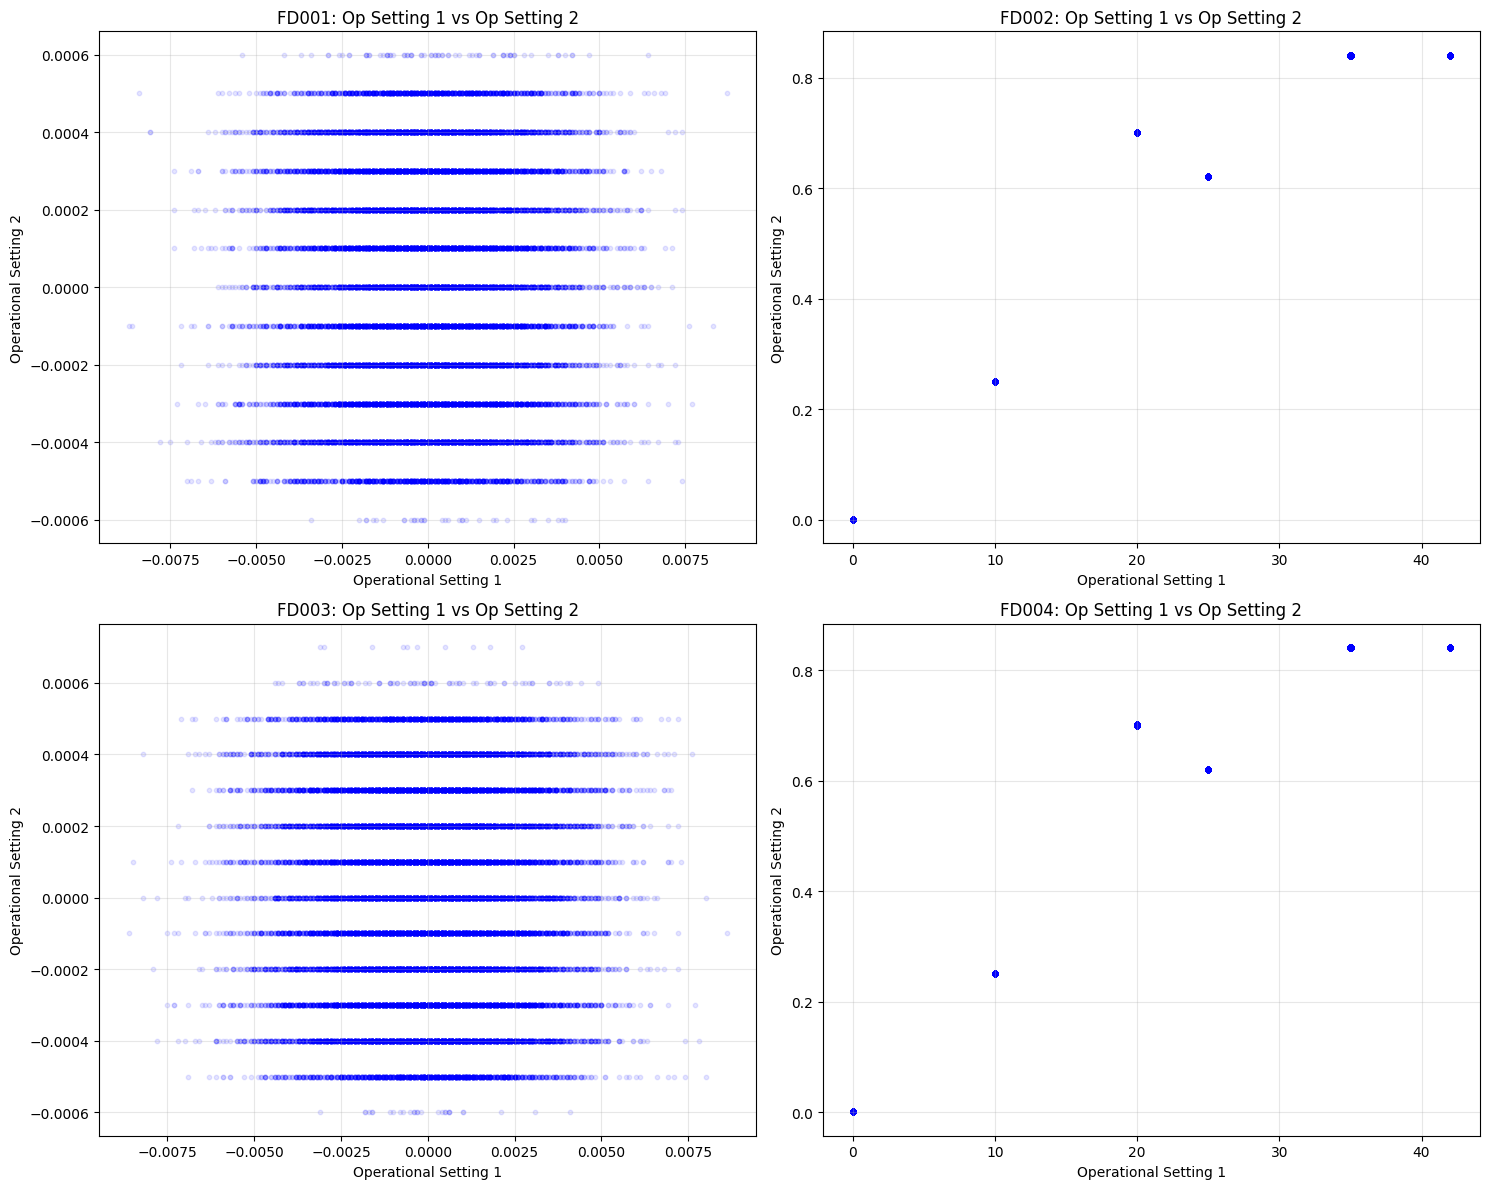

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, (name, df) in enumerate(data_dict.items()):
    ax = axes[i]
    
    # Scatter plot of the first two operational settings
    # We use alpha blending because points will overlap heavily
    ax.scatter(df['op1'], df['op2'], alpha=0.1, s=10, c='blue')
    
    ax.set_title(f"{name}: Op Setting 1 vs Op Setting 2")
    ax.set_xlabel("Operational Setting 1")
    ax.set_ylabel("Operational Setting 2")
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

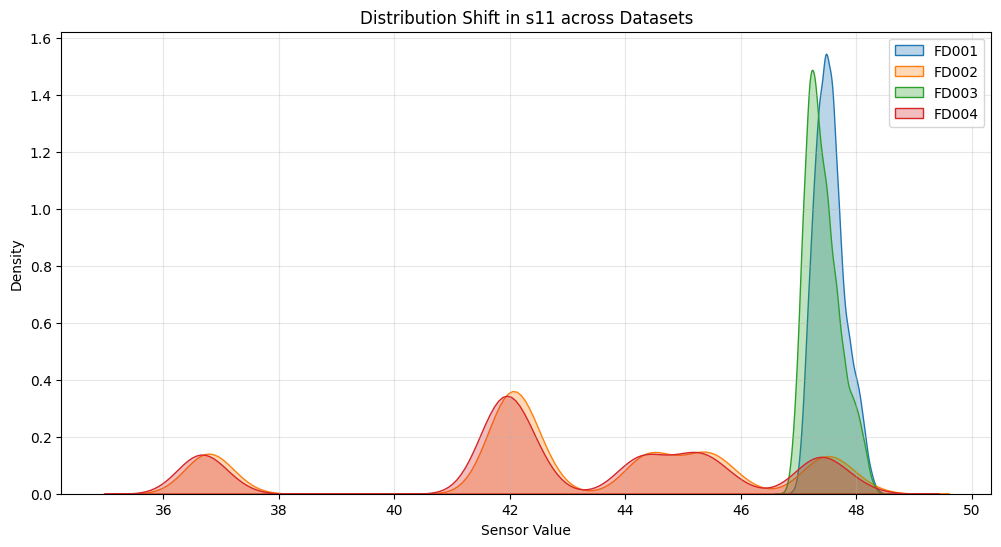

In [ ]:
plt.figure(figsize=(12, 6))

# Plotting KDE for a key sensor to see domain shifts
target_sensor = 's11' # High Pressure Compressure Outlet Static Pressure

for name, df in data_dict.items():
    sns.kdeplot(data=df[target_sensor], label=name, fill=True, alpha=0.3)

plt.title(f"Distribution Shift in {target_sensor} across Datasets")
plt.xlabel("Sensor Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# This forces an interactive table view inside the notebook output
display(data_dict['FD001'])

In [4]:
import pandas as pd
import numpy as np

# Load the data fresh to ensure no state is lost
col_names = ['unit', 'cycle', 'op1', 'op2', 'op3'] + [f's{i}' for i in range(1, 22)]
df = pd.read_csv('../data/train_FD001.txt', sep=r'\s+', header=None, names=col_names)

# Create a summary dataframe
audit = pd.DataFrame({
    'Min': df.min(),
    'Max': df.max(),
    'Mean': df.mean(),
    'Std Dev': df.std(),
    'Variance': df.var(),
    'Zeros': (df == 0).sum(),
    'Missing': df.isnull().sum(),
    'Unique Values': df.nunique()
})

# Filter to show only relevant columns (Op settings + Sensors)
# We transpose it for easier reading (Columns become rows)
display(audit.loc['op1':'s21'].sort_values('Variance'))

,Min,Max,Mean,Std Dev,Variance,Zeros,Missing,Unique Values
op3,100.0000,100.0000,100.000000,0.000000e+00,0.000000e+00,0,0,1
s1,518.6700,518.6700,518.670000,0.000000e+00,0.000000e+00,0,0,1
s19,100.0000,100.0000,100.000000,0.000000e+00,0.000000e+00,0,0,1
s18,2388.0000,2388.0000,2388.000000,0.000000e+00,0.000000e+00,0,0,1
s10,1.3000,1.3000,1.300000,0.000000e+00,0.000000e+00,0,0,1
s16,0.0300,0.0300,0.030000,3.469531e-18,1.203765e-35,0,0,1
s5,14.6200,14.6200,14.620000,5.329200e-15,2.840037e-29,0,0,1
op2,-0.0006,0.0006,0.000002,2.930621e-04,8.588541e-08,2070,0,13
s6,21.6000,21.6100,21.609803,1.388985e-03,1.929279e-06,0,0,2
op1,-0.0087,0.0087,-0.000009,2.187313e-03,4.784340e-06,413,0,158


In [ ]:
print("Can you hear me?")

Can you hear me?


In [3]:
import pandas as pd

# Load
col_names = ['unit', 'cycle', 'op1', 'op2', 'op3'] + [f's{i}' for i in range(1, 22)]
df = pd.read_csv('../data/train_FD001.txt', sep=r'\s+', header=None, names=col_names)

# Calculate variance
variances = df.var()

print("\n--- SENSORS WITH ZERO VARIANCE (DEAD) ---")
print(variances[variances == 0])

print("\n--- DATA SHAPE ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n--- MISSING VALUES ---")
print(df.isnull().sum().sum())


--- SENSORS WITH ZERO VARIANCE (DEAD) ---
op3    0.0
s1     0.0
s10    0.0
s18    0.0
s19    0.0
dtype: float64

--- DATA SHAPE ---
Rows: 20631, Columns: 26

--- MISSING VALUES ---
0


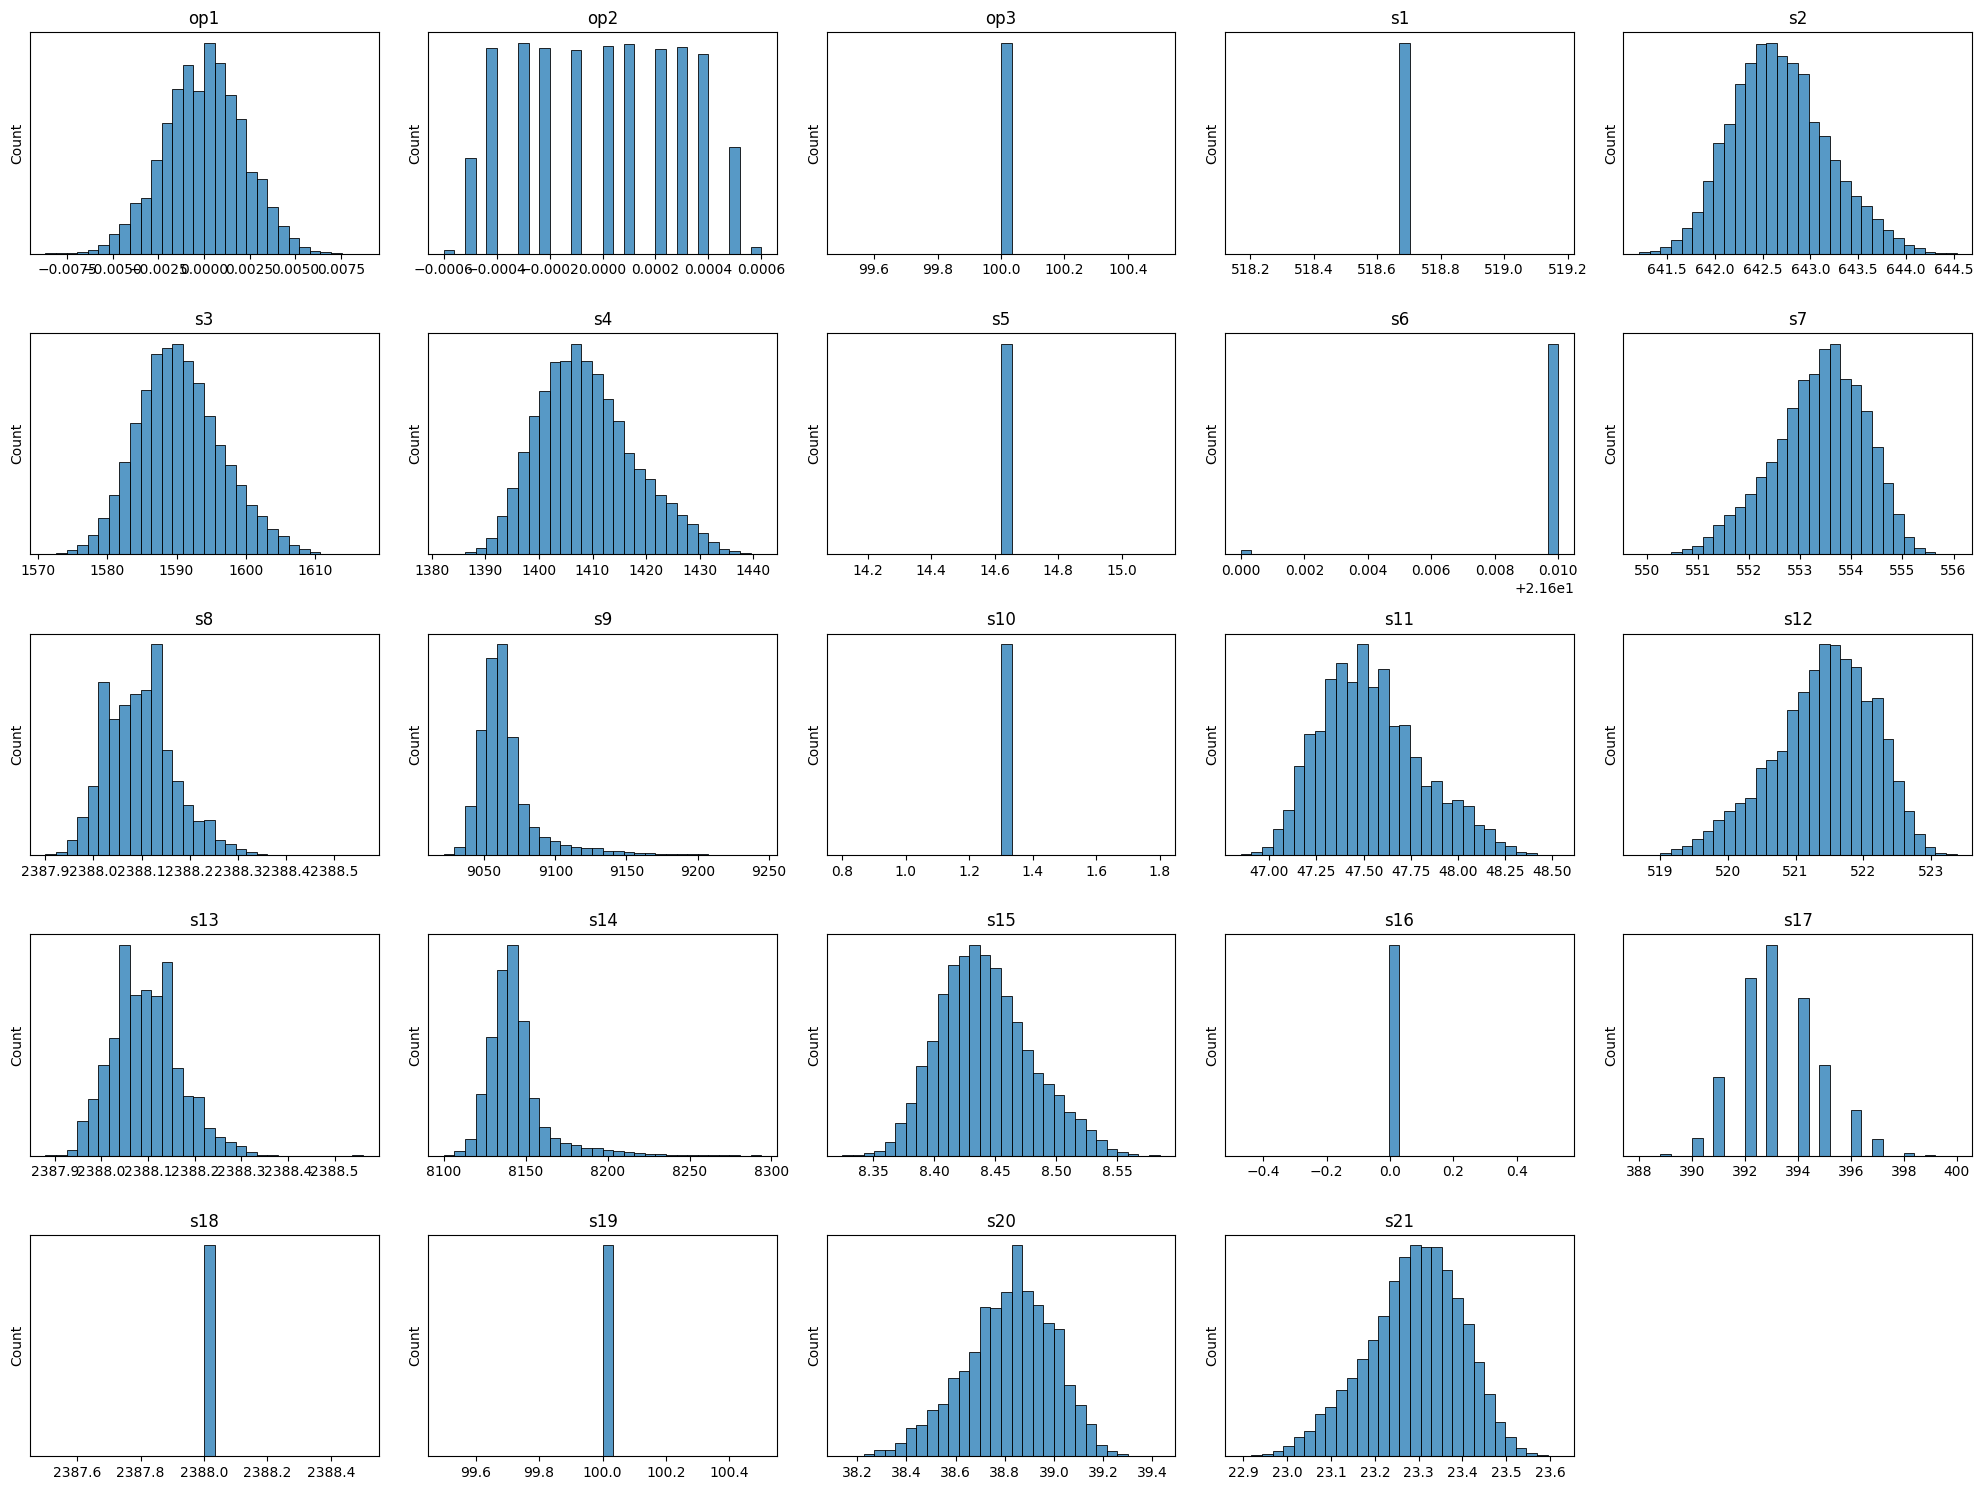

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop Unit and Cycle for plotting
cols_to_plot = [c for c in df.columns if c not in ['unit', 'cycle']]

plt.figure(figsize=(20, 15))
for i, col in enumerate(cols_to_plot):
    plt.subplot(5, 5, i + 1)
    sns.histplot(df[col], bins=30, kde=False)
    plt.title(col)
    plt.yticks([]) # Hide y-axis counts to reduce clutter
    plt.xlabel("")

plt.tight_layout()
plt.show()

Loading train_FD002.txt...


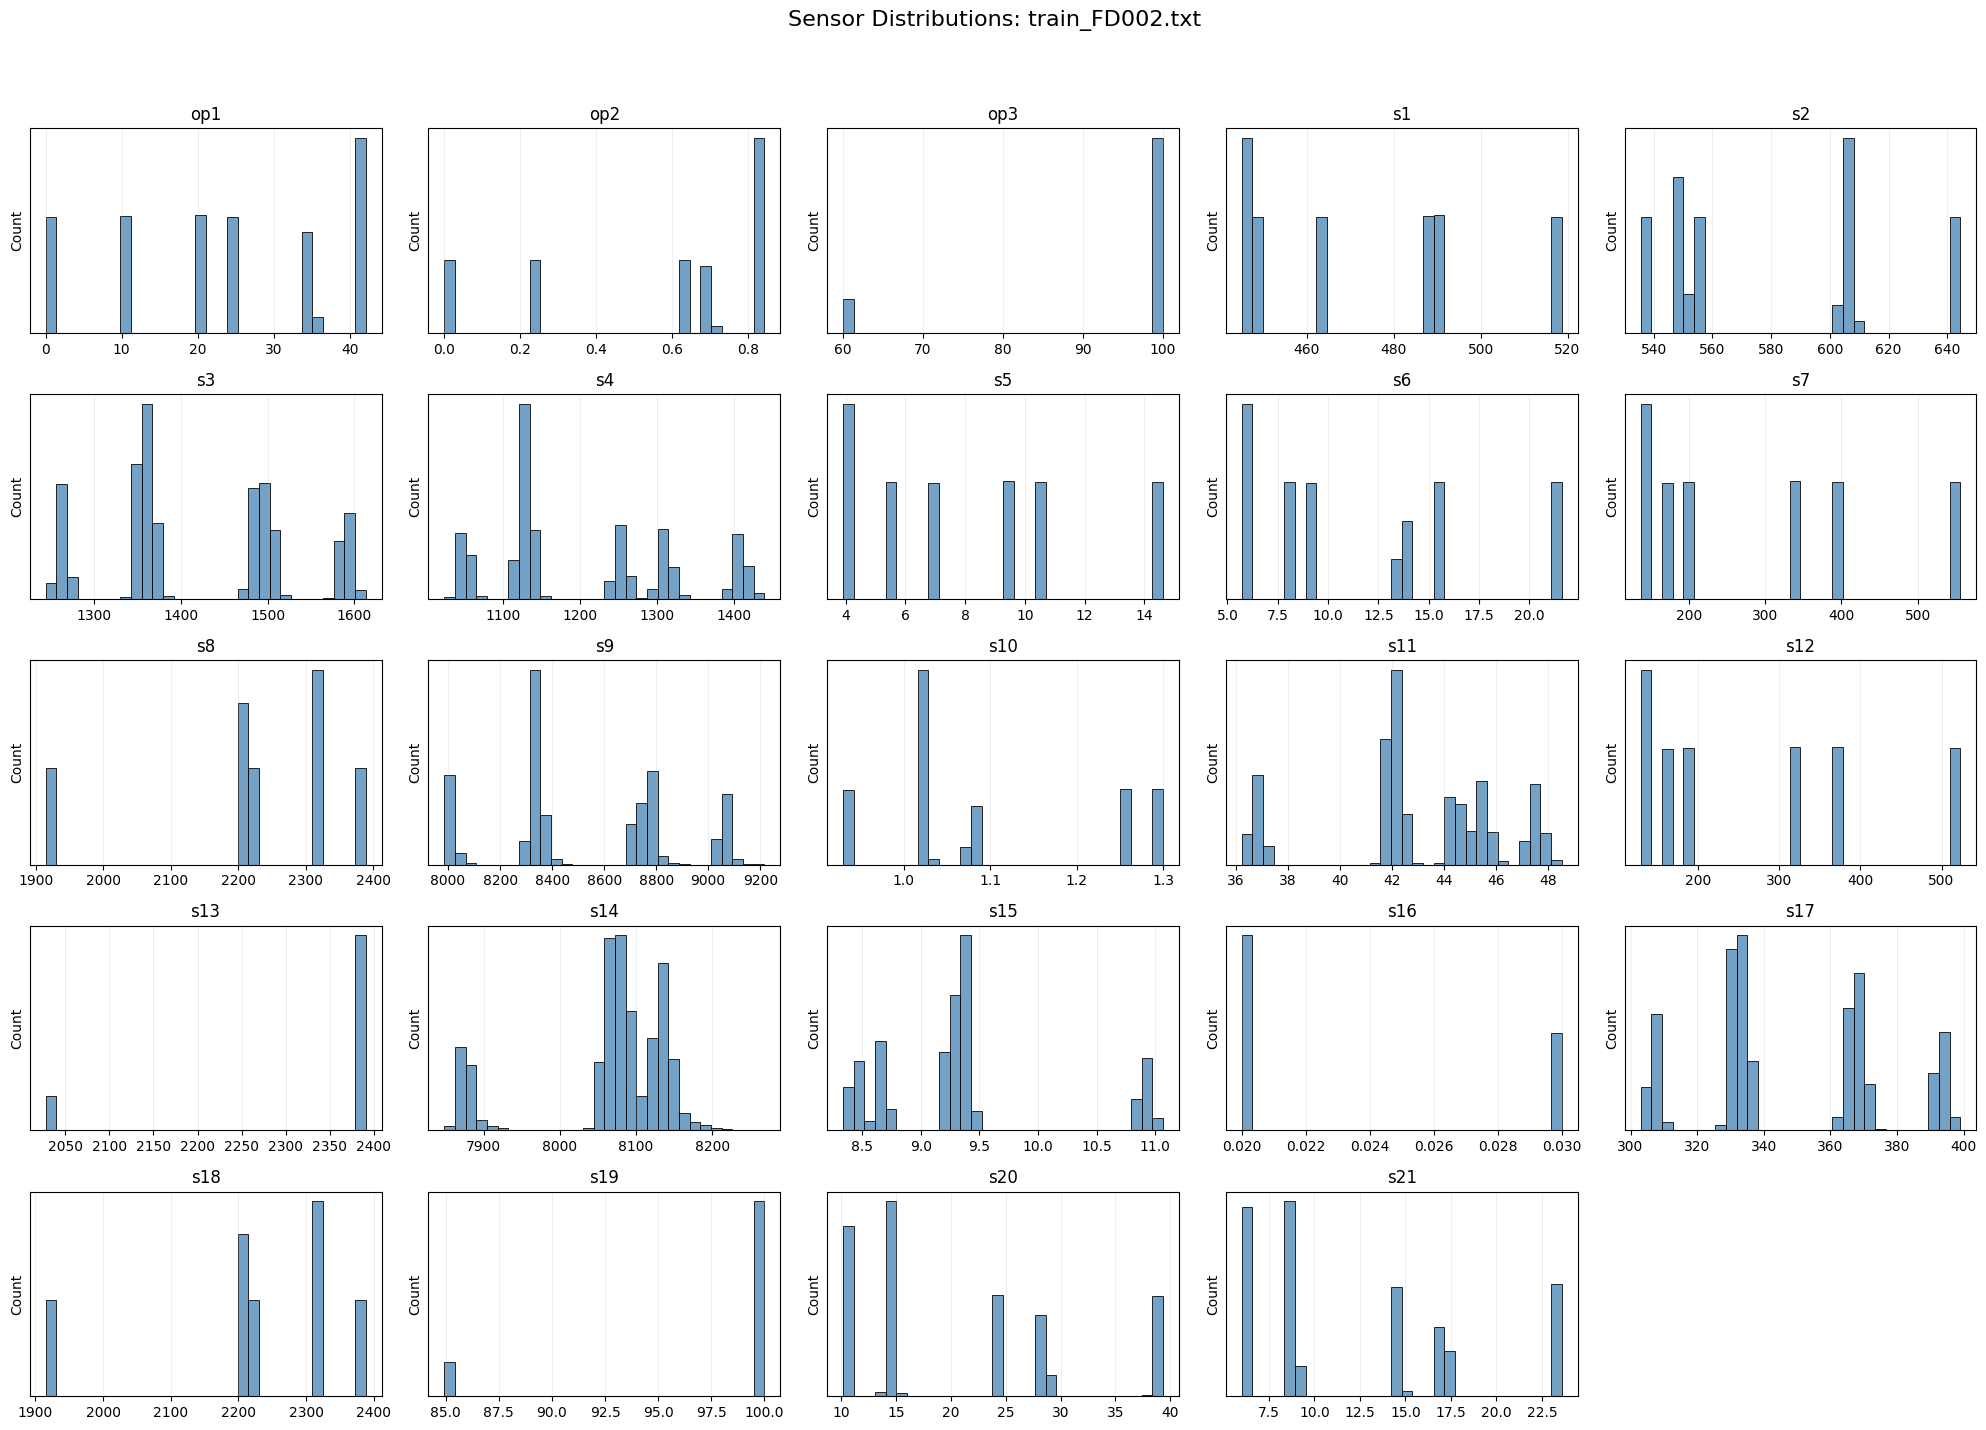

Loading train_FD004.txt...


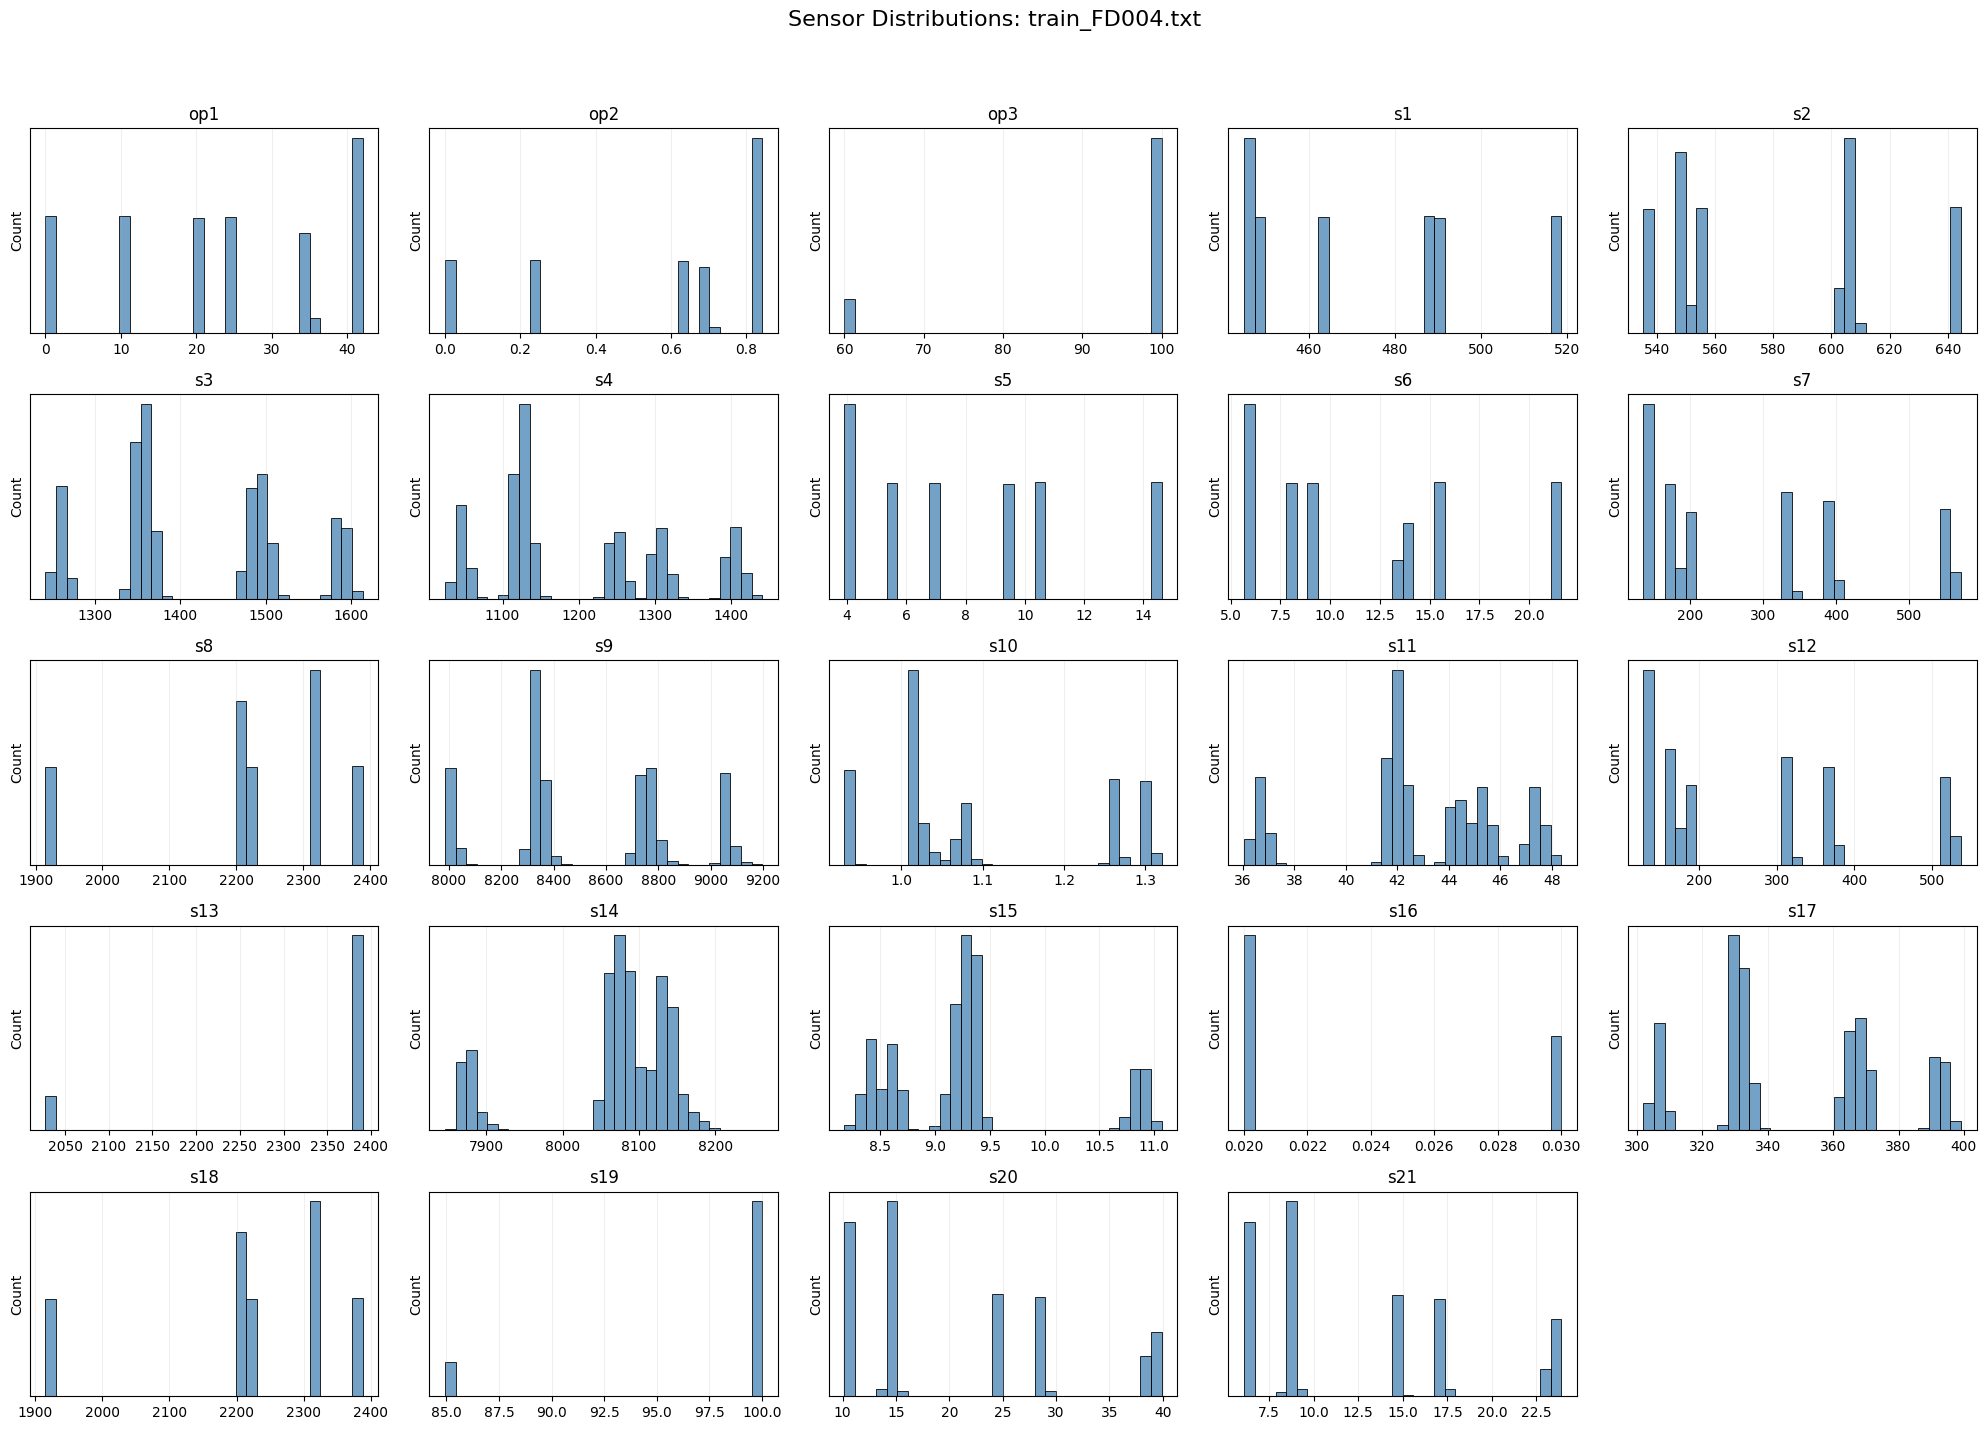

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuration
# Adjusting path based on your notebook location
# DATA_FILES = ['train_FD002.txt', 'train_FD003.txt', 'train_FD004.txt']
# DATA_FILES = ['train_FD003.txt']
DATA_FILES = ['train_FD002.txt', 'train_FD004.txt']
COL_NAMES = ['unit', 'cycle', 'op1', 'op2', 'op3'] + [f's{i}' for i in range(1, 22)]

def plot_dataset_distributions(filename):
    path = os.path.join('../data', filename)
    
    if not os.path.exists(path):
        print(f"Skipping {filename}: File not found at {path}")
        return

    print(f"Loading {filename}...")
    df = pd.read_csv(path, sep=r'\s+', header=None, names=COL_NAMES)
    
    # Identify columns to plot (exclude Unit and Cycle)
    cols_to_plot = [c for c in df.columns if c not in ['unit', 'cycle']]
    
    # Setup the figure grid
    n_cols = 5
    n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols
    
    plt.figure(figsize=(20, 3 * n_rows))
    plt.suptitle(f"Sensor Distributions: {filename}", fontsize=16)
    
    for i, col in enumerate(cols_to_plot):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.histplot(df[col], bins=30, kde=False, color='steelblue')
        plt.title(col)
        plt.yticks([]) # Hide y-axis counts
        plt.xlabel("")
        plt.grid(True, alpha=0.2)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout for suptitle
    plt.show()

# Execute for all 3 files
for f in DATA_FILES:
    plot_dataset_distributions(f)

In [9]:
import pandas as pd
import json
import os

# --- 1. Input Data ---

symbols_raw = """T2 
T24 
T30 
T50 
P2
P15 
P30 
Nf 
Nc 
epr 
Ps30 
phi 
NRf 
NRc 
BPR 
farB 
htBleed 
Nf_dmd 
PCNfR_dmd 
W31
W32"""

desc_raw = """Total temperature at fan inlet
Total temperature at LPC outlet
Total temperature at HPC outlet
Total temperature at LPT outlet
Pressure at fan inlet
Total pressure in bypass-duct
Total pressure at HPC outlet
Physical fan speed
Physical core speed
Engine pressure ratio (P50/P2)
Static pressure at HPC outlet
Ratio of fuel flow to Ps30
Corrected fan speed
Corrected core speed
Bypass Ratio
Burner fuel-air ratio
Bleed Enthalpy
Demanded fan speed
Demanded corrected fan speed
HPT coolant bleed
LPT coolant bleed"""

units_raw = """°R
°R
°R
°R
psia
psia
psia
rpm
rpm
--
psia
pps/psi
rpm
rpm
--
--
--
rpm
rpm
lbm/s
lbm/s"""

desc_short_raw = """temp fan inlet
temp LPC outlet
temp HPC outlet
temp LPT outlet
Press. fan inlet
Press. bypass-duct
Press. HPC outlet
Phys. fan speed
Phys. core speed
Engine press. ratio
Stat. press. HPC outlet
Ratio fuel flow:Ps30
Corr. fan speed
Corr. core speed
Bypass Ratio
Burner fuel-air ratio
Bleed Enthalpy
Demand. fan speed
Demand. corr. fan speed
HPT coolant bleed
LPT coolant bleed"""

# --- 2. Processing ---

# Convert strings to lists
symbols = [s.strip() for s in symbols_raw.strip().split('\n')]
descriptions = [d.strip() for d in desc_raw.strip().split('\n')]
units = [u.strip() for u in units_raw.strip().split('\n')]
short_descs = [sd.strip() for sd in desc_short_raw.strip().split('\n')]

# Verify alignment
assert len(symbols) == len(descriptions) == len(units) == len(short_descs) == 21, "List lengths do not match!"

# Construct Metadata Dictionary
sensor_metadata = {}
for i in range(21):
    sensor_id = f"s{i+1}" # s1, s2, ... s21
    
    sensor_metadata[sensor_id] = {
        "symbol": symbols[i],
        "description": descriptions[i],
        "unit": units[i],
        "short_description": short_descs[i],
        "label": f"{symbols[i]}: {descriptions[i]} ({units[i]})" # Full label for main plots
    }

# --- 3. Artifact Generation ---

def enrich_dataset(filename):
    input_path = os.path.join('../data', filename)
    output_path = os.path.join('../data', filename.replace('.txt', '_enriched.csv'))
    
    if not os.path.exists(input_path):
        print(f"Skipping {filename}: Not found.")
        return

    # Define headers
    headers = ['unit', 'cycle', 'op1', 'op2', 'op3'] + [f's{i}' for i in range(1, 22)]
    
    print(f"Enriching {filename} -> {output_path}...")
    df = pd.read_csv(input_path, sep=r'\s+', header=None, names=headers)
    
    # Save as CSV with headers
    df.to_csv(output_path, index=False)

# Create Enriched CSVs for all 4 datasets
files_to_process = ['train_FD001.txt', 'train_FD002.txt', 'train_FD003.txt', 'train_FD004.txt']
for f in files_to_process:
    enrich_dataset(f)

# Save JSON Metadata
metadata_path = '../data/sensor_metadata.json'
with open(metadata_path, 'w') as f:
    json.dump(sensor_metadata, f, indent=4, ensure_ascii=False) # ensure_ascii=False preserves degree symbol °

print(f"\nMetadata saved to {metadata_path}")
print("--- Sample Entry (s11) ---")
print(json.dumps(sensor_metadata['s11'], indent=4, ensure_ascii=False))

Enriching train_FD001.txt -> ../data/train_FD001_enriched.csv...
Enriching train_FD002.txt -> ../data/train_FD002_enriched.csv...
Enriching train_FD003.txt -> ../data/train_FD003_enriched.csv...
Enriching train_FD004.txt -> ../data/train_FD004_enriched.csv...

Metadata saved to ../data/sensor_metadata.json
--- Sample Entry (s11) ---
{
    "symbol": "Ps30",
    "description": "Static pressure at HPC outlet",
    "unit": "psia",
    "short_description": "Stat. press. HPC outlet",
    "label": "Ps30: Static pressure at HPC outlet (psia)"
}


In [11]:
# Quick verification script
import pandas as pd

# Load Test Features
test_df = pd.read_csv('../data/test_FD002.txt', sep=r'\s+', header=None)
num_test_units = test_df[0].nunique() # Column 0 is Unit ID

# Load Ground Truth
rul_df = pd.read_csv('../data/RUL_FD002.txt', header=None)
num_truth_values = len(rul_df)

print(f"Number of Engines in Test File: {num_test_units}")
print(f"Number of RUL values in Truth File: {num_truth_values}")

Number of Engines in Test File: 259
Number of RUL values in Truth File: 259


In [12]:
import pandas as pd
import numpy as np
import os
import json

# Configuration
DATA_DIR = '../data'
OUTPUT_BASE = '../data/scenarios'
os.makedirs(OUTPUT_BASE, exist_ok=True)

SOURCE_FILES = ['train_FD001.txt', 'train_FD002.txt', 'train_FD003.txt', 'train_FD004.txt']

def process_scenario_with_lineage(filename):
    scenario_name = filename.replace('train_', '').replace('.txt', '') # e.g. FD001
    output_dir = os.path.join(OUTPUT_BASE, scenario_name)
    mapping_dir = os.path.join(output_dir, 'source_mapping')
    
    os.makedirs(output_dir, exist_ok=True)
    os.makedirs(mapping_dir, exist_ok=True)
    
    print(f"\nProcessing {scenario_name} with Lineage...")
    
    # 1. Load Raw
    path = os.path.join(DATA_DIR, filename)
    cols = ['unit', 'cycle', 'op1', 'op2', 'op3'] + [f's{i}' for i in range(1, 22)]
    df = pd.read_csv(path, sep=r'\s+', header=None, names=cols)
    
    # 2. Calculate RUL
    max_cycles = df.groupby('unit')['cycle'].transform('max')
    df['RUL'] = max_cycles - df['cycle']
    
    # 3. Unit-Based Split (60/20/20)
    units = df['unit'].unique()
    n_units = len(units)
    
    n_train = int(n_units * 0.6)
    n_val = int(n_units * 0.2)
    
    train_units = units[:n_train]
    val_units = units[n_train : n_train + n_val]
    test_units = units[n_train + n_val:]
    
    print(f"  Units: Train({len(train_units)}), Val({len(val_units)}), Test({len(test_units)})")
    
    # 4. Create Splits
    df_train = df[df['unit'].isin(train_units)].copy()
    df_val = df[df['unit'].isin(val_units)].copy()
    df_test = df[df['unit'].isin(test_units)].copy()
    
    # 5. Finalize (Shuffle -> Vertical Split)
    # We keep ALL sensors and ALL op settings.
    
    def save_split_and_mapping(df_split, name):
        # SHUFFLE first, so the row order is randomized but consistent between the two files
        df_shuffled = df_split.sample(frac=1, random_state=42).reset_index(drop=True)
        
        # A. The Participant File (Features + Target)
        cols_public = [c for c in df_shuffled.columns if c not in ['unit', 'cycle']]
        df_public = df_shuffled[cols_public]
        
        public_path = os.path.join(output_dir, f"{name}.csv")
        df_public.to_csv(public_path, index=False)
        
        # B. The Mapping File (Metadata + Target for alignment check)
        # We save Unit, Cycle, and RUL. 
        # (RUL is in both, which helps verify alignment if you ever doubt it)
        cols_mapping = ['unit', 'cycle', 'RUL']
        df_mapping = df_shuffled[cols_mapping]
        
        mapping_path = os.path.join(mapping_dir, f"{name}_source.csv")
        df_mapping.to_csv(mapping_path, index=False)
        
        return df_public.shape

    shape_train = save_split_and_mapping(df_train, "train")
    save_split_and_mapping(df_val, "val")
    save_split_and_mapping(df_test, "test")
    
    print(f"  Saved {scenario_name} (Train Shape: {shape_train})")

    # 6. Generate Info JSON
    info = {
        "scenario": scenario_name,
        "description": "Standard NASA split. Rows shuffled.",
        "structure": {
            "main_files": "op1-op3, s1-s21, RUL",
            "mapping_folder": "Contains original unit/cycle for every row in main files."
        }
    }
    with open(os.path.join(output_dir, 'info.json'), 'w') as f:
        json.dump(info, f, indent=4)

# Execute
for f in SOURCE_FILES:
    process_scenario_with_lineage(f)


Processing FD001 with Lineage...
  Units: Train(60), Val(20), Test(20)
  Saved FD001 (Train Shape: (11942, 25))

Processing FD002 with Lineage...
  Units: Train(156), Val(52), Test(52)
  Saved FD002 (Train Shape: (32580, 25))

Processing FD003 with Lineage...
  Units: Train(60), Val(20), Test(20)
  Saved FD003 (Train Shape: (15453, 25))

Processing FD004 with Lineage...
  Units: Train(149), Val(49), Test(51)
  Saved FD004 (Train Shape: (36506, 25))


In [13]:
import pandas as pd
import numpy as np
import os
import json

# --- 1. SETUP & METADATA DEFINITIONS ---

DATA_DIR = '../data'
OUTPUT_BASE = '../data/scenarios'
os.makedirs(OUTPUT_BASE, exist_ok=True)

SOURCE_FILES = ['train_FD001.txt', 'train_FD002.txt', 'train_FD003.txt', 'train_FD004.txt']

SCENARIO_DESCRIPTIONS = {
    "FD001": "One operating condition (Sea Level). One fault mode (HPC Degradation).",
    "FD002": "Six operating conditions. One fault mode (HPC Degradation).",
    "FD003": "One operating condition (Sea Level). Two fault modes (HPC or Fan Degradation).",
    "FD004": "Six operating conditions. Two fault modes (HPC or Fan Degradation)."
}

# The Full Rich Metadata
SENSOR_METADATA = {
    "op1": {
        "description": "Operational Setting 1",
        "unit": "Variable",
        "label": "op1: Operational Setting 1"
    },
    "op2": {
        "description": "Operational Setting 2",
        "unit": "Variable",
        "label": "op2: Operational Setting 2"
    },
    "op3": {
        "description": "Operational Setting 3",
        "unit": "Variable",
        "label": "op3: Operational Setting 3"
    },
    "s1": {
        "symbol": "T2",
        "description": "Total temperature at fan inlet",
        "unit": "°R",
        "short_description": "temp fan inlet",
        "label": "T2: Total temperature at fan inlet (°R)"
    },
    "s2": {
        "symbol": "T24",
        "description": "Total temperature at LPC outlet",
        "unit": "°R",
        "short_description": "temp LPC outlet",
        "label": "T24: Total temperature at LPC outlet (°R)"
    },
    "s3": {
        "symbol": "T30",
        "description": "Total temperature at HPC outlet",
        "unit": "°R",
        "short_description": "temp HPC outlet",
        "label": "T30: Total temperature at HPC outlet (°R)"
    },
    "s4": {
        "symbol": "T50",
        "description": "Total temperature at LPT outlet",
        "unit": "°R",
        "short_description": "temp LPT outlet",
        "label": "T50: Total temperature at LPT outlet (°R)"
    },
    "s5": {
        "symbol": "P2",
        "description": "Pressure at fan inlet",
        "unit": "psia",
        "short_description": "Press. fan inlet",
        "label": "P2: Pressure at fan inlet (psia)"
    },
    "s6": {
        "symbol": "P15",
        "description": "Total pressure in bypass-duct",
        "unit": "psia",
        "short_description": "Press. bypass-duct",
        "label": "P15: Total pressure in bypass-duct (psia)"
    },
    "s7": {
        "symbol": "P30",
        "description": "Total pressure at HPC outlet",
        "unit": "psia",
        "short_description": "Press. HPC outlet",
        "label": "P30: Total pressure at HPC outlet (psia)"
    },
    "s8": {
        "symbol": "Nf",
        "description": "Physical fan speed",
        "unit": "rpm",
        "short_description": "Phys. fan speed",
        "label": "Nf: Physical fan speed (rpm)"
    },
    "s9": {
        "symbol": "Nc",
        "description": "Physical core speed",
        "unit": "rpm",
        "short_description": "Phys. core speed",
        "label": "Nc: Physical core speed (rpm)"
    },
    "s10": {
        "symbol": "epr",
        "description": "Engine pressure ratio (P50/P2)",
        "unit": "--",
        "short_description": "Engine press. ratio",
        "label": "epr: Engine pressure ratio (P50/P2) (--)"
    },
    "s11": {
        "symbol": "Ps30",
        "description": "Static pressure at HPC outlet",
        "unit": "psia",
        "short_description": "Stat. press. HPC outlet",
        "label": "Ps30: Static pressure at HPC outlet (psia)"
    },
    "s12": {
        "symbol": "phi",
        "description": "Ratio of fuel flow to Ps30",
        "unit": "pps/psi",
        "short_description": "Ratio fuel flow:Ps30",
        "label": "phi: Ratio of fuel flow to Ps30 (pps/psi)"
    },
    "s13": {
        "symbol": "NRf",
        "description": "Corrected fan speed",
        "unit": "rpm",
        "short_description": "Corr. fan speed",
        "label": "NRf: Corrected fan speed (rpm)"
    },
    "s14": {
        "symbol": "NRc",
        "description": "Corrected core speed",
        "unit": "rpm",
        "short_description": "Corr. core speed",
        "label": "NRc: Corrected core speed (rpm)"
    },
    "s15": {
        "symbol": "BPR",
        "description": "Bypass Ratio",
        "unit": "--",
        "short_description": "Bypass Ratio",
        "label": "BPR: Bypass Ratio (--)"
    },
    "s16": {
        "symbol": "farB",
        "description": "Burner fuel-air ratio",
        "unit": "--",
        "short_description": "Burner fuel-air ratio",
        "label": "farB: Burner fuel-air ratio (--)"
    },
    "s17": {
        "symbol": "htBleed",
        "description": "Bleed Enthalpy",
        "unit": "--",
        "short_description": "Bleed Enthalpy",
        "label": "htBleed: Bleed Enthalpy (--)"
    },
    "s18": {
        "symbol": "Nf_dmd",
        "description": "Demanded fan speed",
        "unit": "rpm",
        "short_description": "Demand. fan speed",
        "label": "Nf_dmd: Demanded fan speed (rpm)"
    },
    "s19": {
        "symbol": "PCNfR_dmd",
        "description": "Demanded corrected fan speed",
        "unit": "rpm",
        "short_description": "Demand. corr. fan speed",
        "label": "PCNfR_dmd: Demanded corrected fan speed (rpm)"
    },
    "s20": {
        "symbol": "W31",
        "description": "HPT coolant bleed",
        "unit": "lbm/s",
        "short_description": "HPT coolant bleed",
        "label": "W31: HPT coolant bleed (lbm/s)"
    },
    "s21": {
        "symbol": "W32",
        "description": "LPT coolant bleed",
        "unit": "lbm/s",
        "short_description": "LPT coolant bleed",
        "label": "W32: LPT coolant bleed (lbm/s)"
    },
    "RUL": {
        "description": "Remaining Useful Life",
        "unit": "Cycles",
        "label": "RUL: Remaining Useful Life (Cycles)"
    }
}

# --- 2. PROCESSING PIPELINE ---

def process_scenario_final(filename):
    scenario_name = filename.replace('train_', '').replace('.txt', '') # e.g. FD001
    output_dir = os.path.join(OUTPUT_BASE, scenario_name)
    mapping_dir = os.path.join(output_dir, 'source_mapping')
    
    os.makedirs(output_dir, exist_ok=True)
    os.makedirs(mapping_dir, exist_ok=True)
    
    print(f"\nProcessing {scenario_name} (80/20 Split)...")
    
    # Load Raw
    path = os.path.join(DATA_DIR, filename)
    cols = ['unit', 'cycle', 'op1', 'op2', 'op3'] + [f's{i}' for i in range(1, 22)]
    df = pd.read_csv(path, sep=r'\s+', header=None, names=cols)
    
    # Calculate RUL
    max_cycles = df.groupby('unit')['cycle'].transform('max')
    df['RUL'] = max_cycles - df['cycle']
    
    # Unit-Based Split (80/20)
    units = df['unit'].unique()
    n_units = len(units)
    n_train = int(n_units * 0.8)
    
    train_units = units[:n_train]
    test_units = units[n_train:]
    
    print(f"  Units: Train({len(train_units)}), Test({len(test_units)})")
    
    # Create Split Dataframes
    df_train = df[df['unit'].isin(train_units)].copy()
    df_test = df[df['unit'].isin(test_units)].copy()
    
    # Helper to Save Public File + Secret Mapping
    def save_dual_files(df_split, split_type):
        # Shuffle
        df_shuffled = df_split.sample(frac=1, random_state=42).reset_index(drop=True)
        
        # 1. Public File (e.g., train_FD001.csv)
        cols_public = [c for c in df_shuffled.columns if c not in ['unit', 'cycle']]
        df_public = df_shuffled[cols_public]
        
        public_name = f"{split_type}_{scenario_name}.csv"
        df_public.to_csv(os.path.join(output_dir, public_name), index=False)
        
        # 2. Secret Mapping (e.g., train_FD001_source.csv)
        cols_mapping = ['unit', 'cycle', 'RUL']
        df_mapping = df_shuffled[cols_mapping]
        
        mapping_name = f"{split_type}_{scenario_name}_source.csv"
        df_mapping.to_csv(os.path.join(mapping_dir, mapping_name), index=False)
        
        return df_public.shape

    shape_train = save_dual_files(df_train, "train")
    shape_test = save_dual_files(df_test, "test")
    
    print(f"  Saved {scenario_name} (Train Shape: {shape_train})")

    # Generate Rich Info JSON
    info = {
        "scenario": scenario_name,
        "description": SCENARIO_DESCRIPTIONS[scenario_name],
        "files": {
            "train": f"train_{scenario_name}.csv",
            "test": f"test_{scenario_name}.csv"
        },
        "column_metadata": SENSOR_METADATA
    }
    
    with open(os.path.join(output_dir, 'info.json'), 'w') as f:
        json.dump(info, f, indent=4, ensure_ascii=False)

# --- 3. EXECUTE ---
if __name__ == "__main__":
    for f in SOURCE_FILES:
        process_scenario_final(f)


Processing FD001 (80/20 Split)...
  Units: Train(80), Test(20)
  Saved FD001 (Train Shape: (16138, 25))

Processing FD002 (80/20 Split)...
  Units: Train(208), Test(52)
  Saved FD002 (Train Shape: (43103, 25))

Processing FD003 (80/20 Split)...
  Units: Train(80), Test(20)
  Saved FD003 (Train Shape: (19779, 25))

Processing FD004 (80/20 Split)...
  Units: Train(199), Test(50)
  Saved FD004 (Train Shape: (49072, 25))
